In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## 1. Impementing the given image transformation

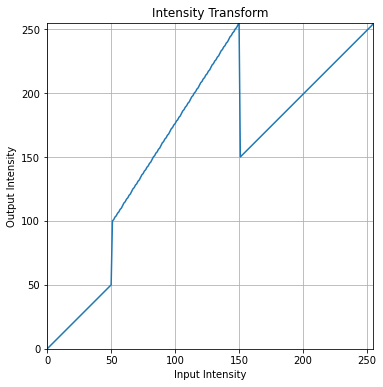

In [2]:
c = np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
# print(t1)
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
# print(t2)
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
# print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('1_transform.png')
plt.show()

In [3]:
img_orig=cv.imread ('images/emma.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## 2. Apply point intensity operations to accentuate,

### 2.1 White matter

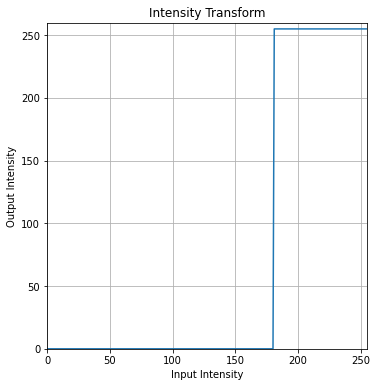

In [4]:
c = np.array([(0,180),(180,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
#print(t1)
t2 = np.linspace(c[1,1], 255, 255 - c[1,0]).astype('uint8')
#print(t2)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_1_white_matter_transform.png')
plt.show()

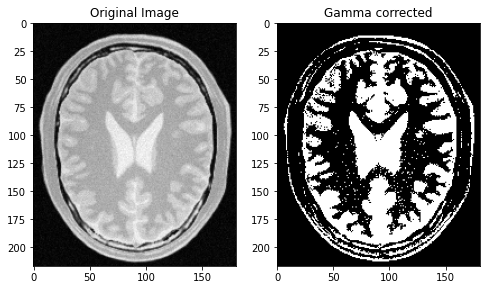

In [5]:
img_orig=cv.imread ('images/BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
assert img_orig is not None

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_orig, cmap='gray')  # Display grayscale image
ax[0].set_title('Original Image')

image_transformed = cv.LUT(img_orig, transform)
ax[1].imshow(image_transformed, cmap='gray')  # Display grayscale transformed image
ax[1].set_title('Gamma corrected')

plt.show()

### 2.2 Gray matter

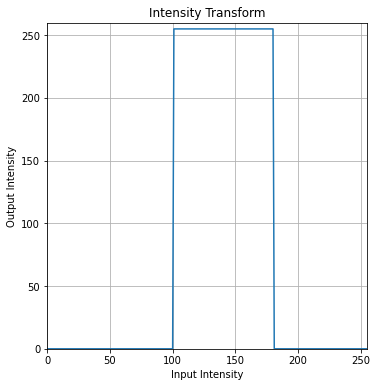

In [6]:
c = np.array([(0,100),(100,255),(180,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
#print(t1)
t2 = np.linspace(c[1,1],c[2,1],c[2,0] - c[1,0] ).astype('uint8')
#print(t2)
t3 = np.linspace(0, 0, 255 - c[2,0]).astype('uint8')
#print(t3)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_2_gray_matter_transform.png')
plt.show()

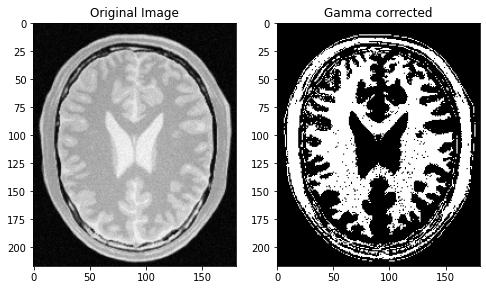

In [7]:
img_orig=cv.imread ('images/BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
assert img_orig is not None

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_orig, cmap='gray')  # Display grayscale image
ax[0].set_title('Original Image')

image_transformed = cv.LUT(img_orig, transform)
ax[1].imshow(image_transformed, cmap='gray')  # Display grayscale transformed image
ax[1].set_title('Gamma corrected')

plt.show()

## 3. Gamma Correction

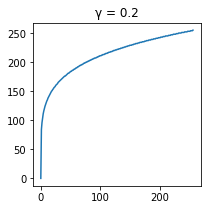

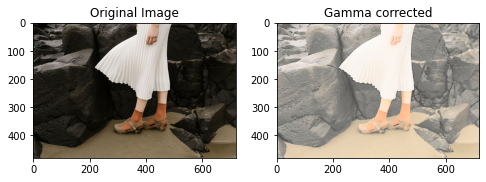

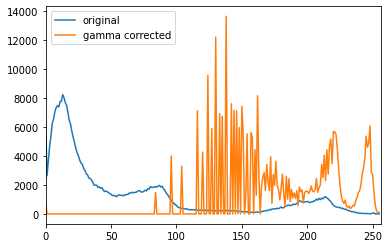

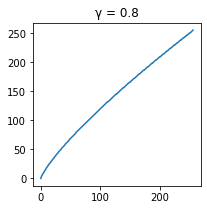

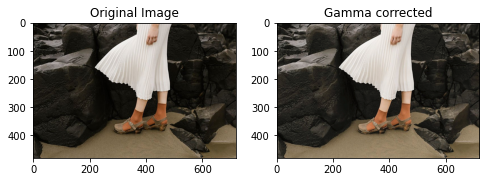

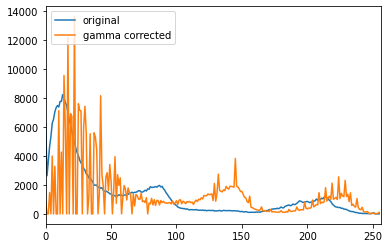

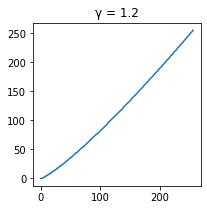

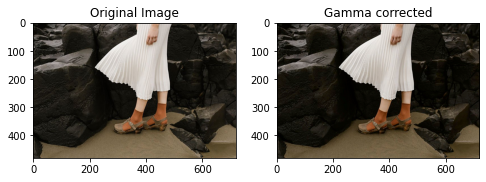

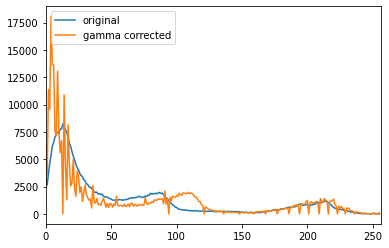

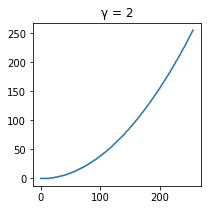

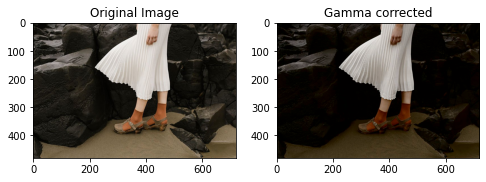

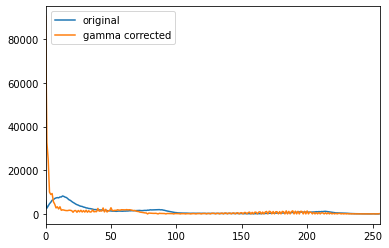

In [8]:
img = cv.imread("images/highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))
gamma = [0.2, 0.8, 1.2, 2]

for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(L, t)
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_title("\u03B3 = " + str(i))
    ax.plot(t)
    
    corrected_img = cv.merge([g, a, b])
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 8))
    ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    
    ax[1].imshow(cv.cvtColor(corrected_img, cv.COLOR_LAB2RGB))
    ax[1].set_title('Gamma corrected')
    plt.show()

    hist1 = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist1)
    plt.xlim([0, 256])

    hist2 = cv.calcHist([corrected_img], [0], None, [256], [0, 256])
    plt.plot(hist2)
    plt.xlim([0, 256])
    plt.legend(('original', 'gamma corrected'), loc='upper left')
    plt.show()


## 4. Aplying an intensity transformation to the saturation plane

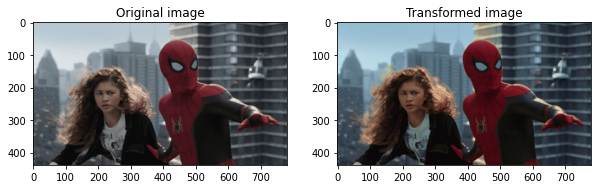

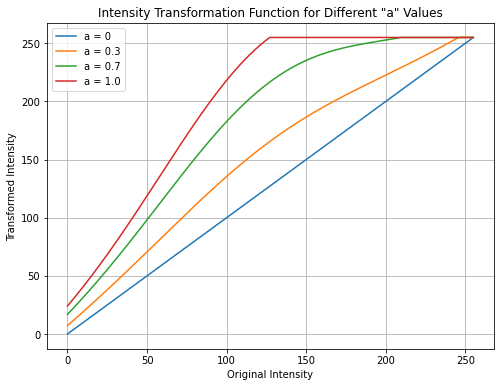

In [9]:
# Load the image in BGR color space
image_bgr = cv.imread('images/spider.png', cv.IMREAD_COLOR)

# Convert the BGR image to HSV color space
image_hsv = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Extract the saturation (S) plane
saturation_plane = image_hsv[:, :, 1]
#print(saturation_plane)

# Define the intensity transformation function
def intensity_transform(x, a, sigma=70):
    f_x = np.clip(x+a*128*np.exp(-(x-128)**2/(2*sigma**2)), 0, 255) #.astype(np.uint8)
    return f_x

# Apply the intensity transform function
transforemed_saturation_plane = intensity_transform(saturation_plane, 0.3)
#print(intensity_transform(saturation_plane, 1))

image_copy = image_hsv.copy()
# recombine the planes
image_copy[:, :, 1] = transforemed_saturation_plane

# Convert the HSV image back to BGR color space
original_image = cv.cvtColor(image_hsv, cv.COLOR_HSV2RGB)
transformed_image = cv.cvtColor(image_copy, cv.COLOR_HSV2RGB)

# Display the images and plots
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(original_image)
axarr[0].set_title('Original image')
axarr[1].imshow(transformed_image)
axarr[1].set_title('Transformed image')


intensity_values = np.arange(256)
a_values = [0, 0.3, 0.7, 1.0]
plt.figure(figsize=(8, 6))

for a in a_values:
    transformation_values = intensity_transform(intensity_values, a)
    plt.plot(intensity_values, transformation_values, label=f'a = {a}')

plt.title('Intensity Transformation Function for Different "a" Values')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()


## 5. Histogram Equalization

In [10]:
def histogram_equalization(im):
    """
    Histogram Equalization
    :param img: input image
    :return: histogram equalized image
    """
    img = cv.imread('images/'+im,cv.IMREAD_GRAYSCALE)

    hist,bins = np.histogram(img.ravel(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram for gray scale picture')
    plt.show()
    equ = cv.equalizeHist(img)
    hist,bins = np.histogram(equ.ravel(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(equ.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram of the Equalized Image')
    plt.show()
    res = np.hstack((img,equ)) #stacking images side-by-side    
    plt.axis('off')
    plt.imshow(res,cmap='gray')



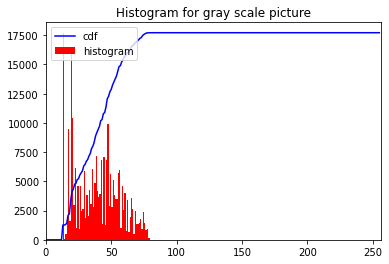

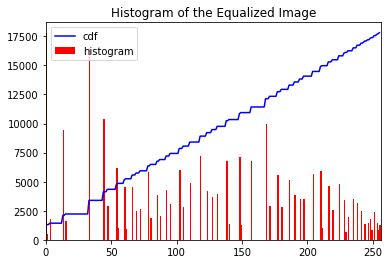

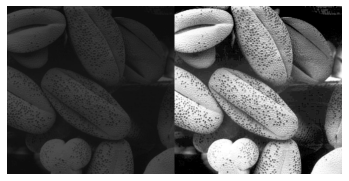

In [11]:
histogram_equalization('shells.tif')

## 6. Histogram equalization to the foreground

### 6.1

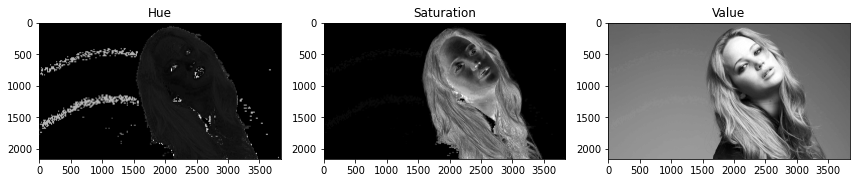

In [12]:
# Load the image
image = cv.imread('images/jeniffer.jpg')

# Convert the image to HSV
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into H, S, and V components
hue = hsv_image[:, :, 0]
saturation = hsv_image[:, :, 1]
value = hsv_image[:, :, 2]

# Display the H, S, V planes in grayscale
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value')

plt.tight_layout()
plt.show()


### 6.3

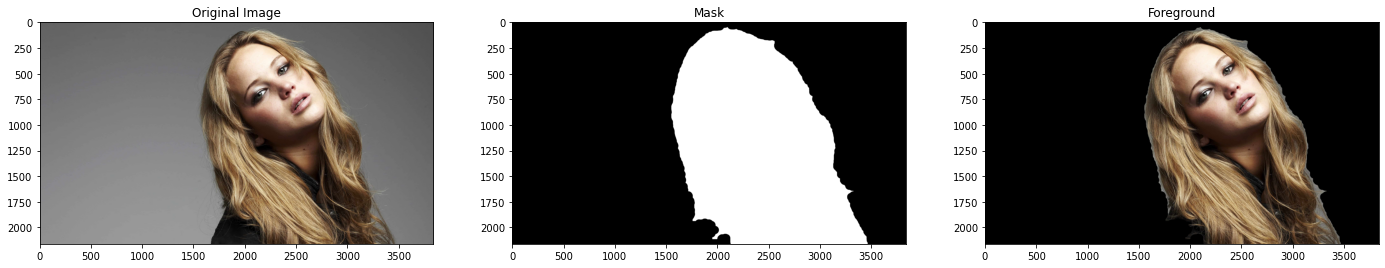

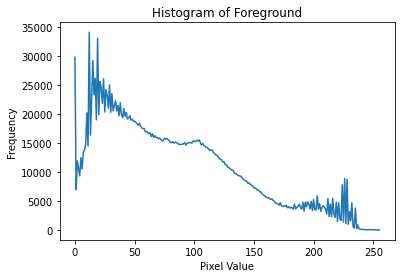

In [13]:
# Define the threshold values for saturation
saturation_min = 15
saturation_max = 255

# Create a binary mask based on saturation
foreground_mask = cv.inRange(saturation, saturation_min, saturation_max)

# Apply morphological operations to reduce noise
foreground_mask = cv.morphologyEx(foreground_mask, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(80, 80)))

# Obtain the foreground using cv.bitwise_and
foreground = cv.bitwise_and(image, image, mask=foreground_mask)

# Compute the histogram of the foreground
histogram = cv.calcHist([foreground], [0], foreground_mask, [256], [0, 256])

# Display the original image, mask, and foreground
plt.figure(figsize=(24, 8))

plt.subplot(131), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(foreground_mask, cmap='gray'), plt.title('Mask')
plt.subplot(133), plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)), plt.title('Foreground')
plt.show()

# Plot the histogram
plt.plot(histogram)
plt.title('Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

### 6.4

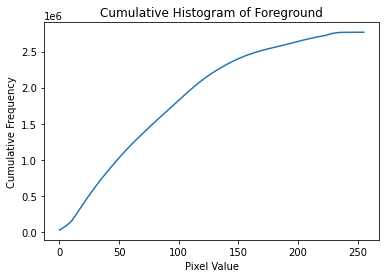

In [14]:
cumulative_histogram = np.cumsum(histogram)

# Plot the cumulative histogram
plt.plot(cumulative_histogram)
plt.title('Cumulative Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.show()


### 6.5

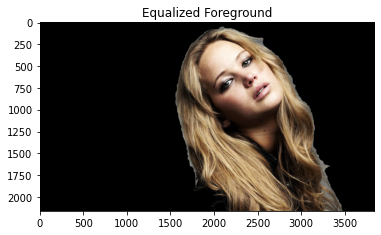

In [15]:
# Convert to grayscale
hsv_foreground = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
value_foreground = hsv_foreground[:, :, 2]

# Apply histogram equalization
equalized_foreground = cv.equalizeHist(value_foreground)

hsv_foreground[:,:,2] = equalized_foreground

plt.imshow(cv.cvtColor(hsv_foreground, cv.COLOR_HSV2RGB)), plt.title('Equalized Foreground')
plt.show()

### 6.6

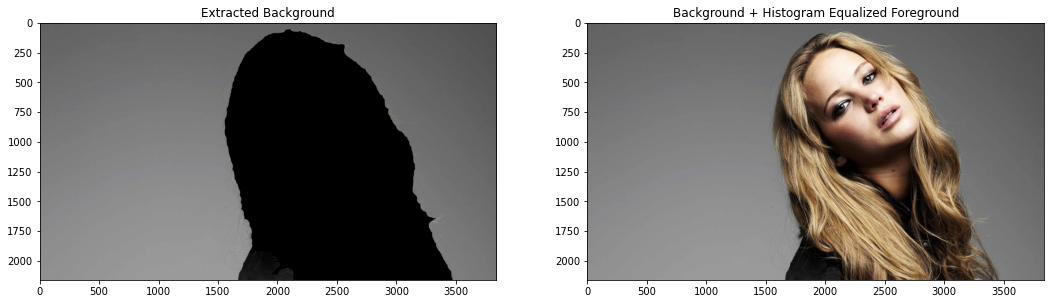

In [16]:
background_mask = cv.bitwise_not(foreground_mask)

# Obtain the background using cv.bitwise_and
extracted_background = cv.bitwise_and(image, image, mask=background_mask)

# Combine the background and histogram-equalized foreground
result = cv.add(extracted_background, cv.cvtColor(hsv_foreground, cv.COLOR_HSV2BGR))

plt.figure(figsize=(18, 6))

# Display the result
plt.subplot(121),plt.imshow(cv.cvtColor(extracted_background, cv.COLOR_BGR2RGB)),plt.title('Extracted Background')
plt.subplot(122),plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB)),plt.title('Background + Histogram Equalized Foreground')
plt.show()

## 7. Sobel Filtering

### 7.1 filter2D function

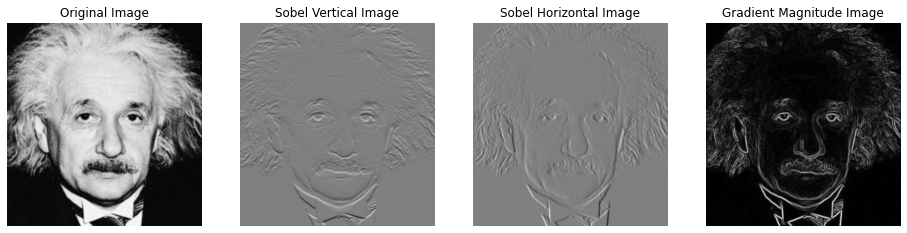

In [22]:
# Load the image in grayscale
im = cv.imread("images/einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

# Define Sobel kernels
sobel_v = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float32')
sobel_h = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float32')

# Apply Sobel filters
imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)

# Compute gradient magnitude
grad_mag = np.sqrt(imv**2 + imh**2)

# Create subplots for visualization
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(16, 16))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')

axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')

axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

# Turn off axis labels
for ax in axes:
    ax.axis('off')

# Display the figure
plt.show()


### 7.2 

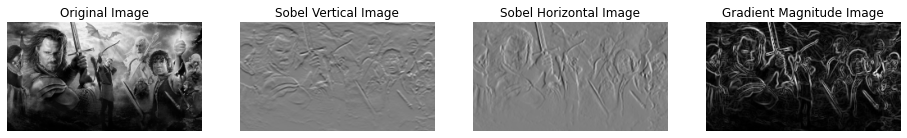

In [56]:
rows, columns = im.shape
kernal_size = 3

# when applied with a kernal of size f the resulting size of the image is (rows-f+1, columns-f+1)
imv = np.zeros((rows-kernal_size+1, columns-kernal_size+1), dtype='float32')
imh = np.zeros((rows-kernal_size+1, columns-kernal_size+1), dtype='float32')

# applying sobel filters
for row in range(rows-kernal_size+1):
    for column in range(columns-kernal_size+1):
        imv[row, column] = np.sum(im[row:row+kernal_size, column:column+kernal_size] * sobel_v)
        imh[row, column] = np.sum(im[row:row+kernal_size, column:column+kernal_size] * sobel_h)

# Compute gradient magnitude
grad_mag = np.sqrt(imv**2 + imh**2)

# Create subplots for visualization
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(16, 16))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')

axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')

axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

# Turn off axis labels
for ax in axes:
    ax.axis('off')

# Display the figure
plt.show()

### 7.3 

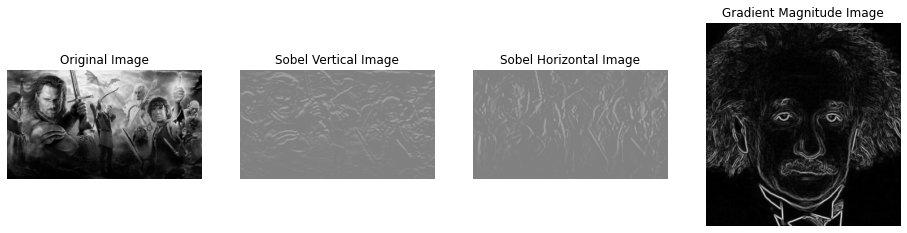

In [55]:
# Sobel kernels
sobel_h_kernel = np.array([1, 2, 1], dtype=np.float32)
sobel_v_kernel = np.array([1, 0, -1], dtype=np.float32)

# Apply Sobel filtering using sepFilter2D
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)

# Compute gradient magnitude
grad_mag = np.sqrt(imv**2 + imh**2)

# Create a subplot for visualization
fig, axes = plt.subplots(1, 4, figsize=(16, 16))

# Display images
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original Image")

axes[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title("Sobel Vertical Image")

axes[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title("Sobel Horizontal Image")

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

# Turn off axis labels
for ax in axes:
    ax.axis('off')

plt.show()


## 8. Zoom Images

In [51]:
def zoom_the_image(image, scale, method = 'nearest-neighbour'):
    rows = round(scale*image.shape[0])
    cols = round(scale*image.shape[1])

    zoomed = np.zeros((rows, cols), dtype=image.dtype)

    if (method == 'nearest-neighbour'):
        for i in range(rows):
            for j in range(cols):
                zoomed[i][j] = image[round(i/scale), round(j/scale)]
    
    if (method == 'bilinear interpolation'):
        for i in range(rows):
            for j in range(cols):
                x = i/scale
                y = j/scale
                x1 = np.floor(x)
                y1 = np.floor(y)
                x2 = np.ceil(x)
                y2 = np.ceil(y)
                if (x2 >= image.shape[0]):
                    x2 = x1
                if (y2 >= image.shape[1]):
                    y2 = y1
                dx = x - x1
                dy = y - y1
                zoomed[i][j] = image[x1][y1]*(1-dx)*(1-dy) + image[x1][y2]*(1-dx)*dy + image[x2][y1]*dx*(1-dy) + image[x2][y2]*dx*dy

    return zoomed


In [52]:
im = cv.imread("images/zooming/im01small.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
print(im.shape)
scale = 2

zoomed_image = zoom_the_image(im, scale, 'nearest-neighbour')
fig,axis = plt.subplots(1,1,figsize=(10,10))
axis.imshow(zoomed_image, cmap='gray'), axis.set_title('Zoomed Image'), axis.axis('off')


(135, 240)


IndexError: index 240 is out of bounds for axis 1 with size 240